# Shopping Card : An Analytical

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

Were gonna focused at orders 

```
Orders  ->  Customer (id)
            Sales (id)      ->  Product (id)
```

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


From Order date and delivery date we could get the gap on when the order made and when the delivery happened. Lets call it delivery Time

In [4]:
orders.order_date = pd.to_datetime(orders.order_date)
orders.delivery_date = pd.to_datetime(orders.delivery_date)

In [8]:
orders['delivery_time'] = (orders['delivery_date'] - orders['order_date']).dt.days


# Get Month at dates to get distribution
orders['order_month'] = orders['order_date'].dt.to_period('M').dt.month
orders['delivery_month'] = orders['delivery_date'].dt.to_period('M').dt.month

In [9]:
orders

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,order_month,delivery_month
0,1,64,30811,2021-08-30,2021-09-24,25,8,9
1,2,473,50490,2021-02-03,2021-02-13,10,2,2
2,3,774,46763,2021-10-08,2021-11-03,26,10,11
3,4,433,39782,2021-05-06,2021-05-19,13,5,5
4,5,441,14719,2021-03-23,2021-03-24,1,3,3
...,...,...,...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02,20,1,2
996,997,346,53831,2021-01-18,2021-01-31,13,1,1
997,998,407,53308,2021-05-05,2021-05-21,16,5,5
998,999,428,31643,2021-06-15,2021-07-12,27,6,7


In [10]:
feats = ['delivery_time','order_month','delivery_month']

# Lets Take a look on distribution
orders[feats].describe().round()

,delivery_time,order_month,delivery_month
count,1000.0,1000.0,1000.0
mean,14.0,5.0,6.0
std,8.0,3.0,3.0
min,1.0,1.0,1.0
25%,8.0,3.0,3.0
50%,14.0,5.0,6.0
75%,21.0,8.0,8.0
max,27.0,10.0,11.0


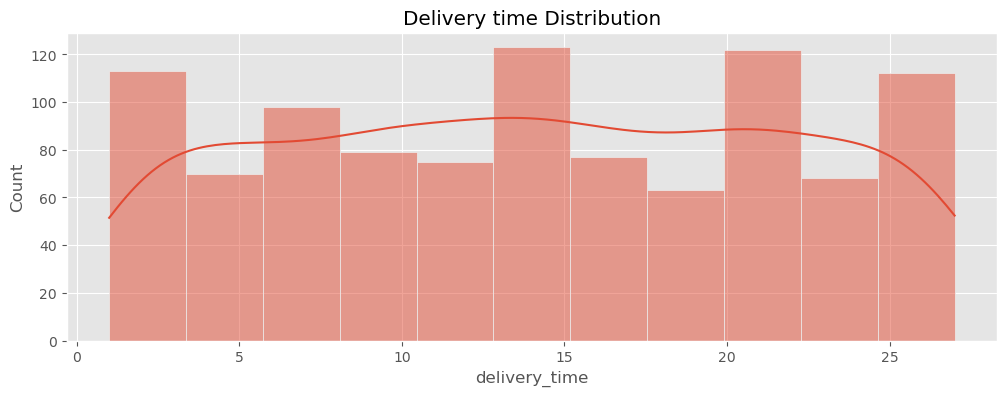

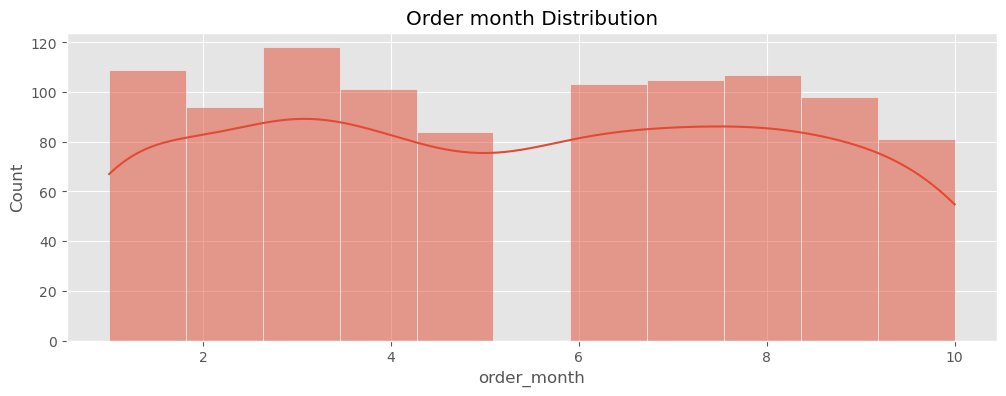

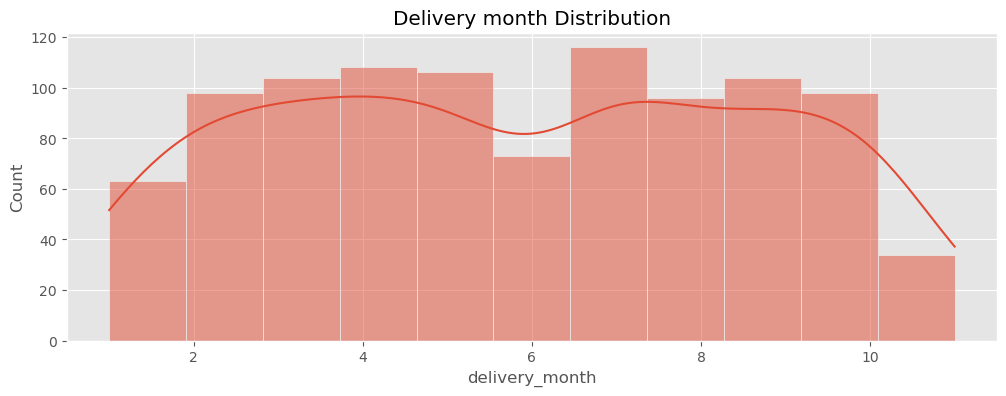

In [15]:


for col in feats:
    plt.figure(figsize=(12,4))
    # orders[col].hist()
    sns.histplot(orders[col],kde=True)
    plt.title(f"{col.replace('_',' ').capitalize()} Distribution")
    plt.show()

Based on graph above we know that :
- Most of order are Received / Delivered at 14 days
- Peak orders are made at month 3

In [16]:
# Lets take a look at payment, myb we can get shipping prices

totals = []

for ids in orders.order_id.values:
    totals.append(sales[sales.order_id == ids].total_price.sum())

In [18]:
sales.total_price.describe()

count    5000.000000
mean      206.360000
std        86.357457
min        90.000000
25%       112.000000
50%       204.000000
75%       285.000000
max       357.000000
Name: total_price, dtype: float64

In [19]:
shipping_prices = orders.payment - totals
shipping_prices

0      29324
1      49360
2      46255
3      38806
4      12676
       ...  
995    36384
996    53627
997    51956
998    31203
999    27836
Name: payment, Length: 1000, dtype: int64

Its doesnt make any sense, shipping prices that high. So lets forget how much the shipping was

In [20]:
# Let's Create a new Dataframe

temp_df = orders[['order_id','customer_id']]

In [21]:
customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [24]:
#Based on Customers data, we can profile the customer leading to trends

responds = []

for ids in orders.customer_id.values:
    respond = customers[customers.customer_id == ids].gender.values[0]
    # print(respond)
    if respond not in ['Male','Female']:
        respond = 'Non Binary'
    responds.append(respond)


temp_df['Gender'] = responds

temp_df.head()

C:\Users\intel\AppData\Local\Temp\ipykernel_20864\701148957.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Gender'] = responds


,order_id,customer_id,Gender
0,1,64,Non Binary
1,2,473,Male
2,3,774,Non Binary
3,4,433,Non Binary
4,5,441,Non Binary


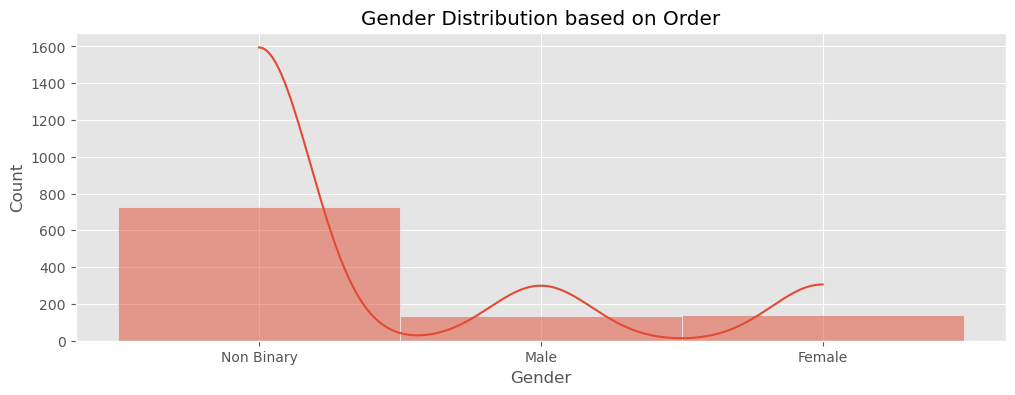

In [25]:
#Let's take a look on how Gender distribution based on order

plt.figure(figsize=(12,4))
sns.histplot(temp_df['Gender'],kde=True)
plt.title("Gender Distribution based on Order")
plt.show()

In [27]:
from collections import Counter

In [28]:
responds = []

for ids in temp_df.order_id.values:
    # print(temp_df[temp_df.order_id == ids].Gender.values[0] )
    if temp_df[temp_df.order_id == ids].Gender.values[0] not in ['Male','Female']:
        new_respond = sales[sales.order_id == ids].product_id.values
        # print(new_respond)
    responds.extend(list(new_respond))

NonBinerBoughts = list(dict(sorted(Counter(responds).items(),key=lambda item:item[1],reverse=True)[:10]).keys())


In [29]:
products[products.product_ID.isin(NonBinerBoughts)]

,product_ID,product_type,product_name,size,colour,price,quantity,description
78,78,Shirt,Flannel,L,orange,96,59,"A orange coloured, L sized, Flannel Shirt"
182,182,Shirt,Camp Collared,M,orange,112,65,"A orange coloured, M sized, Camp Collared Shirt"
490,490,Jacket,Windbreaker,XS,red,109,79,"A red coloured, XS sized, Windbreaker Jacket"
539,539,Jacket,Leather,XL,yellow,113,67,"A yellow coloured, XL sized, Leather Jacket"
554,554,Jacket,Leather,XL,indigo,113,52,"A indigo coloured, XL sized, Leather Jacket"
737,737,Jacket,Peacoat,M,red,102,59,"A red coloured, M sized, Peacoat Jacket"
788,788,Jacket,Pullover,L,green,114,72,"A green coloured, L sized, Pullover Jacket"
886,886,Trousers,Cords,S,yellow,113,68,"A yellow coloured, S sized, Cords Trousers"
1149,1149,Trousers,Cargo Pants,XL,indigo,106,64,"A indigo coloured, XL sized, Cargo Pants Trousers"
1188,1188,Trousers,High-Waisted,L,violet,98,68,"A violet coloured, L sized, High-Waisted Trousers"


Turns out there are initial prices on each product. Therefore we can likely have the revenue of each sales

In [42]:
# lets see how much each revenue on each sales
responds = []
for ids in sales.product_id.values:
    initial = products[products.product_ID == ids].price.values
    revenue = sales[sales.product_id == ids].price_per_unit.values[0] - initial
    responds.extend(revenue)
sales['Revenue'] = responds

productRevenue=sales.groupby('product_id').sum()

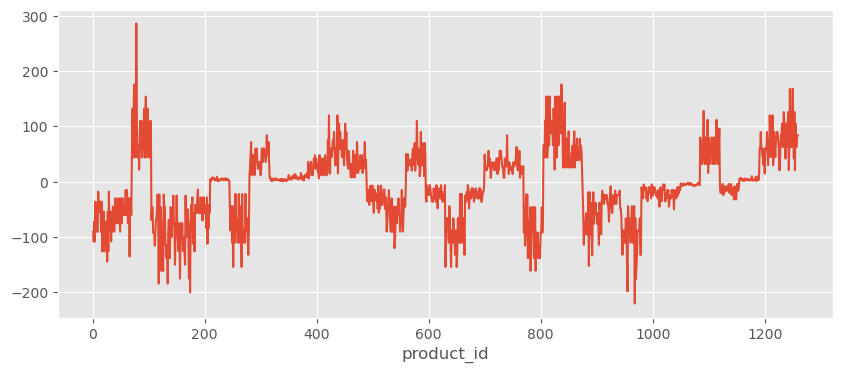

In [43]:
plt.figure(figsize=(10,4))
productRevenue['Revenue'].plot()
plt.show()

In [37]:
sales.Revenue.max()

22

In [53]:
prod_id = productRevenue[productRevenue.Revenue == productRevenue.Revenue.max()]

products[products.product_ID == prod_id.index[0]]

,product_ID,product_type,product_name,size,colour,price,quantity,description
78,78,Shirt,Flannel,L,orange,96,59,"A orange coloured, L sized, Flannel Shirt"


Most bought items are Product Number 78

In [63]:
flannels_prod = products[products.product_name == 'Flannel'].product_ID.values

In [65]:
# Count Shop Revenue 

sales[sales.product_id.isin(flannels_prod)].Revenue.sum()

3102

In [72]:
# What about its competitor

competitors = products[(products.product_type == 'Shirt') & (products.product_name != 'Flannel')]
competitors.product_name.unique()

array(['Oxford Cloth', 'Dress', 'Denim', 'Linen', 'Camp Collared',
       'Chambray', 'Polo', 'Cuban Collar', 'Mandarin Collar', 'Henley',
       'Casual Slim Fit'], dtype=object)

In [76]:
comps_Revenue ={}
for shopName in competitors.product_name.unique():
    # print(shopName)
    comps = products[products.product_name == shopName].product_ID.values
    productReturn = sales[sales.product_id.isin(comps)].Revenue.sum()

    comps_Revenue[shopName] = productReturn

comps_Revenue['Flannel'] = sales[sales.product_id.isin(flannels_prod)].Revenue.sum()


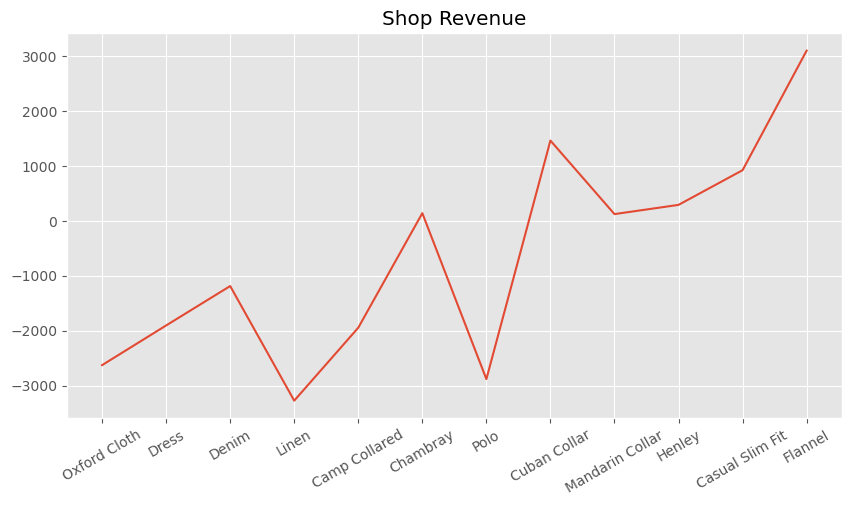

In [84]:
plt.figure(figsize=(10,5))
plt.plot(comps_Revenue.keys(),comps_Revenue.values())
plt.title('Shop Revenue')
plt.xticks(rotation=30)
plt.show()

In [85]:
# make me curious on how sales growth over month or year
# lets take a look if the sales / orders are more than 1 year

orders['order_years'] = orders['order_date'].dt.to_period('Y').dt.year

In [87]:
orders.order_years.unique()

array([2021], dtype=int64)

Apparently the order record only 1 year. therefore we could use month to see on its each shop growth or even types

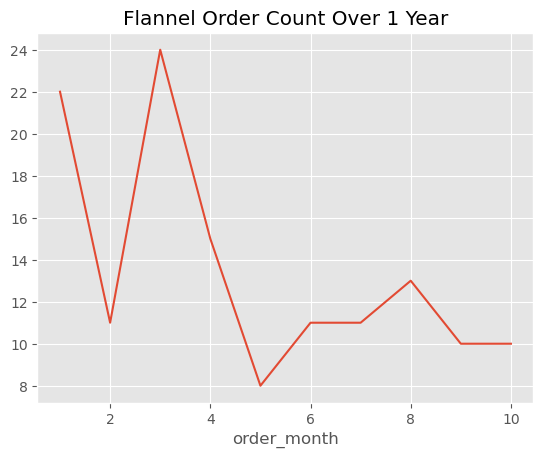

In [98]:
flannels_orders = sales[sales.product_id.isin(flannels_prod)].order_id.values
orders[orders.order_id.isin(flannels_orders)].groupby('order_month')['order_id'].count().plot()
plt.title('Flannel Order Count Over 1 Year')
plt.show()

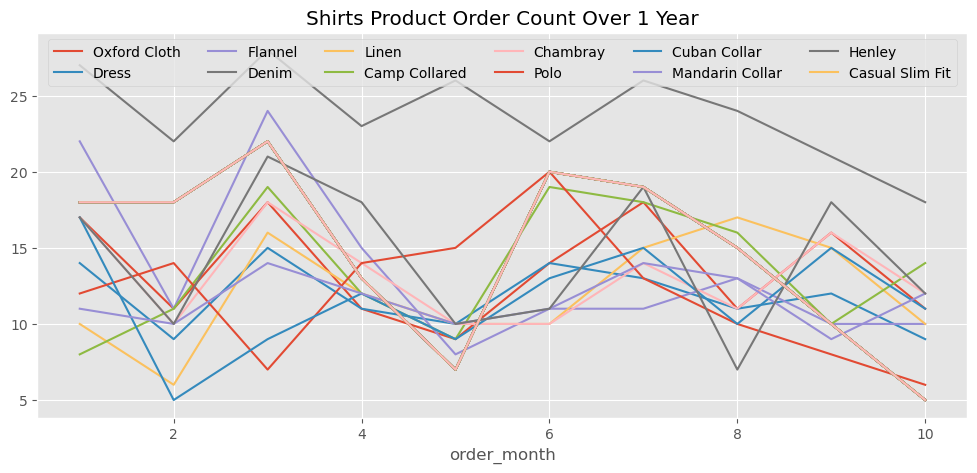

In [135]:
plt.figure(figsize=(12,5))
for shopName in products.product_name.unique():
    # print(shopName)
    if products[products.product_name == shopName].product_type.values[0] == 'Shirt':
        prods = products[products.product_name == shopName].product_ID.values
    # productReturn = sales[sales.product_id.isin(comps)].Revenue.sum()

    prods_orders = sales[sales.product_id.isin(prods)].order_id.values
    orders[orders.order_id.isin(prods_orders)].groupby('order_month')['order_id'].count().plot()


plt.title('Shirts Product Order Count Over 1 Year')
plt.legend(products[products.product_type == 'Shirt'].product_name.unique(),loc='upper center',ncol=6)
plt.show()

